# Bike Sharing Case Study

### Import libraries

In [1317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [1318]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Cleaning

- We will drop the columns __instant__ and __dteday__ as they are not useful.
- Instant is just a serial number and dteday is not required as there are other derived columns for date and day.
- __registered__ users are more likely to avail the service irrespective of other variables. So it is not going to be a good predictor for analysis. We will drop the column.
- Since __casual__ users is a difference between total rentals and registered users, we will drop this column too.

In [1320]:
bike_sharing = bike_sharing.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

- __Season__ and __Weathersit__ are categorical variables.
- We need to add dummy variables for these to better understand their relationship with the target variable
- Season has 4 values - (1:spring, 2:summer, 3:fall, 4:winter)
- Weathersit has 4 values - Clear, Cloudy, Light Snow/Rain, Heavy Snow/Rain
- We will first convert these variables from int values to string, that will help us generate dummy variables for them

In [1322]:
bike_sharing[['season']] = bike_sharing[['season']].apply(lambda x: x.map({1: 'spring', 2: 'summer', 3: 'fall', 4:'winter'}))
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1323]:
bike_sharing[['weathersit']] = bike_sharing[['weathersit']].apply(lambda x: x.map(
    {1: 'clear', 2: 'cloudy', 3: 'light rain or snow', 4:'heavy rain or snow'}
))
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [1324]:
season = pd.get_dummies(bike_sharing['season'], dtype='int', drop_first=True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


- Spring is 100
- Summer is 010
- Winter is 001
- Fall is 000

In [1326]:
bike_sharing = pd.concat([season, bike_sharing], axis=1)
bike_sharing.head()

,spring,summer,winter,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,spring,0,1,0,6,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,spring,0,1,0,0,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


Repeat similar steps for __weathersit__ column

In [1328]:
weathersit = pd.get_dummies(bike_sharing['weathersit'], dtype='int')
weathersit.head()

,clear,cloudy,light rain or snow
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


__weathersit__ doesn't have any row with 'Heavy rain or snow'. So we cannot drop a column from the dummy dataframe. We need to have 3 columns.

In [1330]:
bike_sharing = pd.concat([weathersit, bike_sharing], axis=1)
bike_sharing.head()

,clear,cloudy,light rain or snow,spring,summer,winter,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,1,0,1,0,0,spring,0,1,0,6,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,1,0,1,0,0,spring,0,1,0,0,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,1,0,0,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,1,0,0,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,1,0,0,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


We can now drop the columns __season__ and __weathersit__ as they are not required.

In [1332]:
bike_sharing = bike_sharing.drop(['season', 'weathersit'], axis=1)
bike_sharing.head()

,clear,cloudy,light rain or snow,spring,summer,winter,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
0,0,1,0,1,0,0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985
1,0,1,0,1,0,0,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,1,0,0,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,1,0,0,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,1,0,0,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600


### Scatter plots

We will draw scatter plots to check if any variables have linear relationships with the target variable i.e. __cnt__.

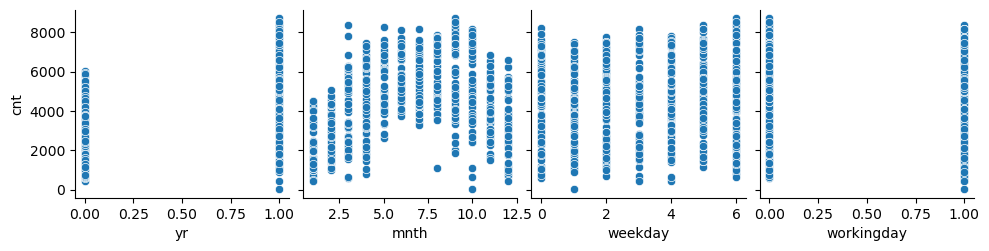

In [1334]:
sns.pairplot(bike_sharing, x_vars=['yr', 'mnth', 'weekday', 'workingday'], y_vars='cnt', kind='scatter')
plt.show()

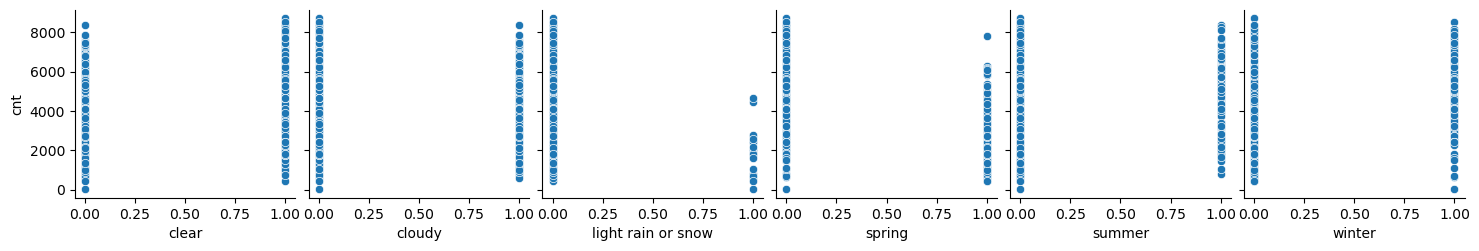

In [1335]:
sns.pairplot(bike_sharing, x_vars=['clear', 'cloudy', 'light rain or snow', 'spring', 'summer', 'winter'], y_vars='cnt', kind='scatter')
plt.show()

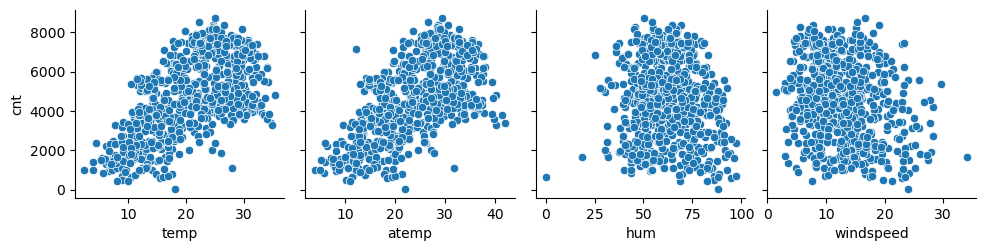

In [1336]:
sns.pairplot(bike_sharing, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars='cnt', kind='scatter')
plt.show()

- We can infer from the above plots that there sems to be a clear positive Linear relationship between __cnt__ and __temp__ and __cnt__ and __atemp__.
- Columns __hum__ and __windspeed__ may have multicolinearity with other variables. Need to investigate further.

### Splitting data into Training and Test sets

In [1339]:
from sklearn.model_selection import train_test_split

In [1340]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

print(bike_sharing.shape)
print(bike_train.shape)
print(bike_test.shape)

(730, 16)
(510, 16)
(219, 16)


### Scaling variables

We should scale all numeric variables to make them comparable

In [1342]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [1343]:
num_vars = bike_sharing.columns

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,clear,cloudy,light rain or snow,spring,summer,winter,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
653,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.818182,0.0,0.333333,1.0,0.509887,0.501133,0.575354,0.300794,0.864243
576,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.545455,0.0,0.333333,1.0,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.181818,0.0,1.000000,0.0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.272727,0.0,1.000000,0.0,0.395666,0.391735,0.504508,0.188475,0.482973


### Correlation

We will plot a heatmap to see which variables are correlated

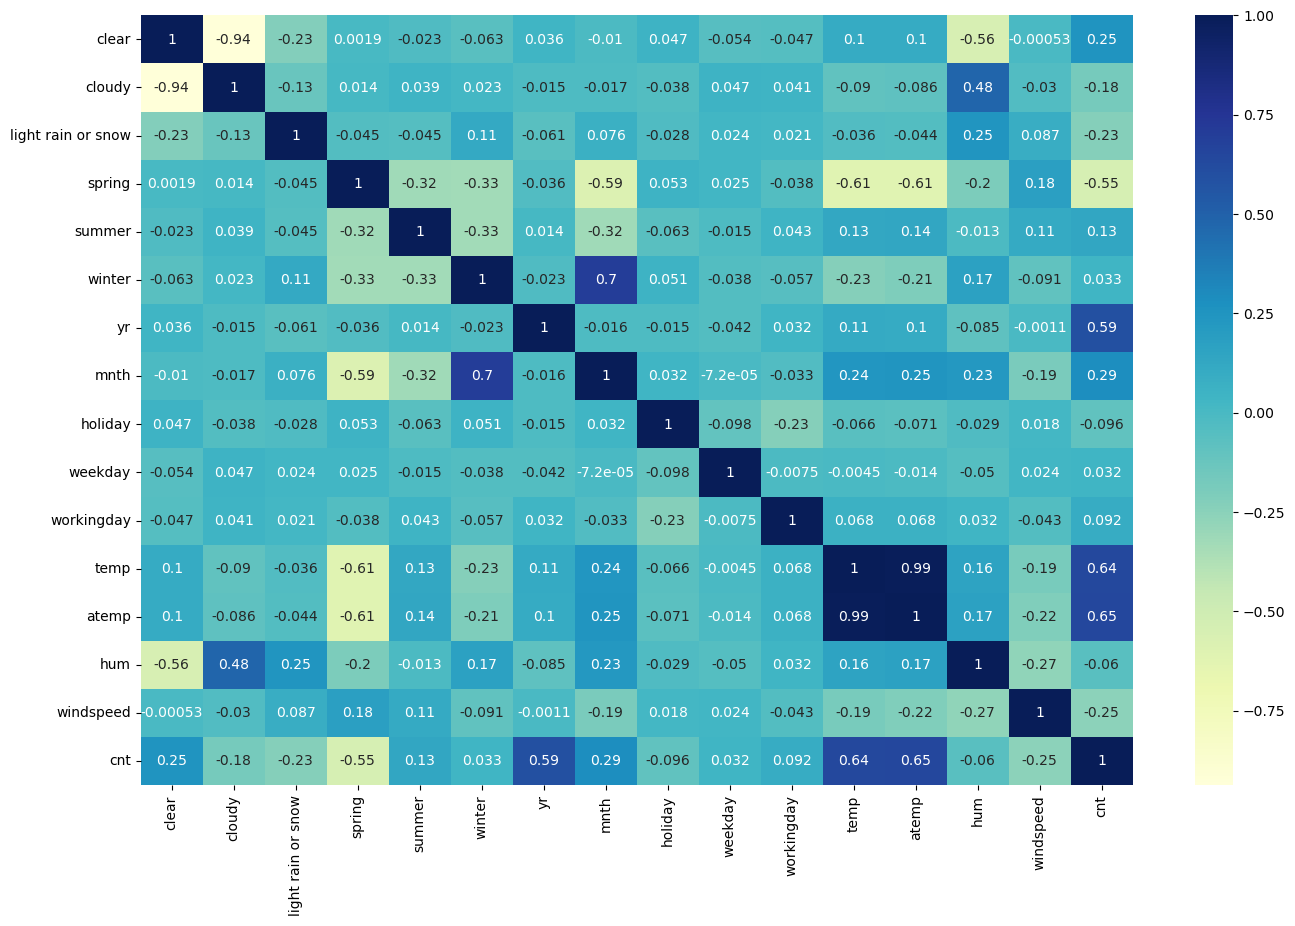

In [1345]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the heat map we can infer the following -
- The variables with which __cnt__ is highly correlated are -   __temp, atemp, yr__
- __Temp__ and __atemp__ are strongly corelated. Case of multicolinearity.
- There seems to be some correlation between __cloudy__ and __hum__. Need to investigate more.
- There seems to be some correlation between __registered__ and __temp__. Need to investigate more.


## Building a LR Model

### Dividing into X and Y

In [1349]:
y_train = bike_train.pop('cnt')
X_train = bike_train

Let's start by fitting a model with independent variables as __temp__, __atemp__ and __yr__

In [1351]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp', 'atemp', 'yr']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [1352]:
lr.params

const    0.072352
temp     0.076265
atemp    0.545027
yr       0.237672
dtype: float64

In [1353]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     385.8
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          2.62e-130
Time:                        13:18:09   Log-Likelihood:                 341.97
No. Observations:                 510   AIC:                            -675.9
Df Residuals:                     506   BIC:                            -659.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0724      0.015      4.820      0.000       0.043       0.102
temp           0.0763      0.169      0.451      0.652      -0.256       0.408
atemp          0.5450      0.180      3.032      0.003       0.192       0.898
yr             0.2377      0.011     21.471      0.000       0.216       0.259
==============================================================================
Omnibus:                       37.600   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.841
Skew:                          -0.544   Prob(JB):                     7.49e-13
Kurtosis:                       4.201   Cond. No.                         61.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared is 0.696 which is decent.
- P value is high for both temp which suggests we should either drop them or they are multicolinear
- Let us drop temp and see how the model fits

In [1355]:
X_train_lm = sm.add_constant(X_train[['atemp', 'yr']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.07e-131
Time:                        13:18:10   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.000       0.043       0.102
atemp          0.6252      0.026     24.001      0.000       0.574       0.676
yr             0.2378      0.011     21.511      0.000       0.216       0.260
==============================================================================
Omnibus:                       38.030   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.520
Skew:                          -0.536   Prob(JB):                     1.96e-13
Kurtosis:                       4.266   Cond. No.                         6.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's see if we can further improve the model by adding few more variables.

In [1357]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp', 'yr', 'mnth', 'holiday', 'workingday', 'weekday']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     222.6
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          4.57e-138
Time:                        13:18:10   Log-Likelihood:                 369.02
No. Observations:                 510   AIC:                            -724.0
Df Residuals:                     503   BIC:                            -694.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0075      0.019      0.394      0.694      -0.030       0.045
atemp          0.5772      0.026     22.418      0.000       0.527       0.628
yr             0.2414      0.011     22.895      0.000       0.221       0.262
mnth           0.1153      0.017      6.705      0.000       0.082       0.149
holiday       -0.0579      0.034     -1.683      0.093      -0.126       0.010
workingday     0.0165      0.012      1.433      0.152      -0.006       0.039
weekday        0.0391      0.016      2.492      0.013       0.008       0.070
==============================================================================
Omnibus:                       80.853   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.557
Skew:                          -0.871   Prob(JB):                     2.50e-37
Kurtosis:                       5.213   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Both R-squared and Adjusted R-squared increased slightly from the previous model
- So some variables are definitely significant
- Let's call this __Model 1__
- Let's now build a model using Scikit-learn and use RFE to determine significant variables


### Building Model using SKLearn

#### Dividing into train and test set

In [1361]:
np.random.seed(0)
bike_train_sk, bike_test_sk = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Scaling the values

In [1363]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [1364]:
num_vars = bike_sharing.columns

bike_train_sk[num_vars] = scaler.fit_transform(bike_train_sk[num_vars])
bike_train.head()

,clear,cloudy,light rain or snow,spring,summer,winter,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed
653,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.818182,0.0,0.333333,1.0,0.509887,0.501133,0.575354,0.300794
576,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.545455,0.0,0.333333,1.0,0.815169,0.766351,0.725633,0.264686
426,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.181818,0.0,1.000000,0.0,0.442393,0.438975,0.640189,0.255342
728,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.245101,0.200348,0.498067,0.663106
482,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.272727,0.0,1.000000,0.0,0.395666,0.391735,0.504508,0.188475


In [1365]:
y_train_sk = bike_train_sk.pop('cnt')
X_train_sk = bike_train_sk

#### Calculating RFE

In [1367]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1368]:
# Running RFE with the output number of the variable =10
lm = LinearRegression()
lm.fit(X_train_sk, y_train_sk)

rfe = RFE(estimator=lm, n_features_to_select=10)          
rfe = rfe.fit(X_train_sk, y_train_sk)

In [1369]:
list(zip(X_train_sk.columns,rfe.support_,rfe.ranking_))

[('clear', True, 1),
 ('cloudy', False, 3),
 ('light rain or snow', True, 1),
 ('spring', True, 1),
 ('summer', False, 4),
 ('winter', True, 1),
 ('yr', True, 1),
 ('mnth', False, 6),
 ('holiday', True, 1),
 ('weekday', False, 2),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [1370]:
col = X_train_sk.columns[rfe.support_]
col

Index(['clear', 'light rain or snow', 'spring', 'winter', 'yr', 'holiday',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

- Let's build a model with these columns and compare it with previous model
- And then calculate VIF and see if we need to drop some variables

In [1372]:
import statsmodels.api as sm  

X_train_rfe = X_train_sk[col]
X_train_rfe = sm.add_constant(X_train_rfe)

lm_1 = sm.OLS(y_train_sk,X_train_rfe).fit() 
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.0
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          3.24e-181
Time:                        13:18:10   Log-Likelihood:                 481.84
No. Observations:                 510   AIC:                            -941.7
Df Residuals:                     499   BIC:                            -895.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2817      0.037      7.655      0.000       0.209       0.354
clear                  0.0549      0.011      4.952      0.000       0.033       0.077
light rain or snow    -0.1906      0.026     -7.236      0.000      -0.242      -0.139
spring                -0.1163      0.016     -7.460      0.000      -0.147      -0.086
winter                 0.0538      0.013      4.139      0.000       0.028       0.079
yr                     0.2320      0.009     27.143      0.000       0.215       0.249
holiday               -0.0874      0.027     -3.250      0.001      -0.140      -0.035
temp                   0.3401      0.135      2.518      0.012       0.075       0.605
atemp                  0.1110      0.142      0.779      0.436      -0.169       0.391
hum                   -0.1291      0.039     -3.276      0.001      -0.206      -0.052
windspeed             -0.1663      0.027     -6.128      0.000      -0.220      -0.113
==============================================================================
Omnibus:                       66.681   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.277
Skew:                          -0.668   Prob(JB):                     2.88e-37
Kurtosis:                       5.477   Cond. No.                         79.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next we will drop variable __atemp__  as it has high p-value

In [1374]:
X_train_rfe = X_train_rfe.drop(['atemp'], axis=1)
lm_1 = sm.OLS(y_train_sk,X_train_rfe).fit() 
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.1
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          2.64e-182
Time:                        13:18:10   Log-Likelihood:                 481.53
No. Observations:                 510   AIC:                            -943.1
Df Residuals:                     500   BIC:                            -900.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2830      0.037      7.700      0.000       0.211       0.355
clear                  0.0552      0.011      4.987      0.000       0.033       0.077
light rain or snow    -0.1921      0.026     -7.312      0.000      -0.244      -0.140
spring                -0.1165      0.016     -7.475      0.000      -0.147      -0.086
winter                 0.0547      0.013      4.217      0.000       0.029       0.080
yr                     0.2320      0.009     27.149      0.000       0.215       0.249
holiday               -0.0883      0.027     -3.287      0.001      -0.141      -0.036
temp                   0.4427      0.030     14.741      0.000       0.384       0.502
hum                   -0.1270      0.039     -3.232      0.001      -0.204      -0.050
windspeed             -0.1697      0.027     -6.341      0.000      -0.222      -0.117
==============================================================================
Omnibus:                       64.488   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.977
Skew:                          -0.646   Prob(JB):                     4.07e-36
Kurtosis:                       5.450   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-values of all variables are withing acceptable limits. We will check VIF now to determine multicolinearity.

All variables look significant now based on p-value. Let's check the VIF now.

In [1377]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1378]:
# Calculate VIF after removing constant
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [1379]:
vif_2 = pd.DataFrame()
vif_2['Features'] = X_train_new.columns
vif_2['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif_2['VIF'] = round(vif_2['VIF'], 2)
vif_2 = vif_2.sort_values(by = "VIF", ascending = False)
vif_2

,Features,VIF
7,hum,16.24
6,temp,14.84
8,windspeed,4.04
0,clear,3.18
2,spring,2.76
3,winter,2.20
4,yr,2.05
1,light rain or snow,1.13
5,holiday,1.04


- __temp__ and __hum__ have high VIF. 
- So Let's drop temp and __hum__ and check the model.

In [1381]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)
lm_1 = sm.OLS(y_train_sk,X_train_rfe).fit() 
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     285.9
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          2.62e-181
Time:                        13:18:10   Log-Likelihood:                 476.25
No. Observations:                 510   AIC:                            -934.5
Df Residuals:                     501   BIC:                            -896.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1925      0.024      8.010      0.000       0.145       0.240
clear                  0.0759      0.009      8.341      0.000       0.058       0.094
light rain or snow    -0.2062      0.026     -7.886      0.000      -0.258      -0.155
spring                -0.1191      0.016     -7.578      0.000      -0.150      -0.088
winter                 0.0469      0.013      3.651      0.000       0.022       0.072
yr                     0.2349      0.009     27.390      0.000       0.218       0.252
holiday               -0.0892      0.027     -3.291      0.001      -0.143      -0.036
temp                   0.4214      0.030     14.248      0.000       0.363       0.479
windspeed             -0.1452      0.026     -5.605      0.000      -0.196      -0.094
==============================================================================
Omnibus:                       63.227   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.197
Skew:                          -0.641   Prob(JB):                     1.21e-34
Kurtosis:                       5.389   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Let's check VIF again

In [1383]:
# Calculate VIF after removing constant
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [1384]:
vif_2 = pd.DataFrame()
vif_2['Features'] = X_train_new.columns
vif_2['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif_2['VIF'] = round(vif_2['VIF'], 2)
vif_2 = vif_2.sort_values(by = "VIF", ascending = False)
vif_2

,Features,VIF
6,temp,4.29
7,windspeed,3.93
0,clear,2.82
4,yr,2.05
2,spring,1.70
3,winter,1.37
1,light rain or snow,1.11
5,holiday,1.04


- This model __Model 2 (lm_1)__ has a good R-squared 0.82.
- The adjusted R-squared is also close to R-squared
- This model more importantly has the below features
    - the VIF for all variables of __Model 2__ are below 5 
    - and p-values of all variables are significant
- The R-squared and Adjusted R-squared is higher than __Model 1__
- Hence __Model 2__ seems to be better fit. We will now evaluate the model

### Residual Analysis of training set

In [1387]:
y_train_cnt = lm_1.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

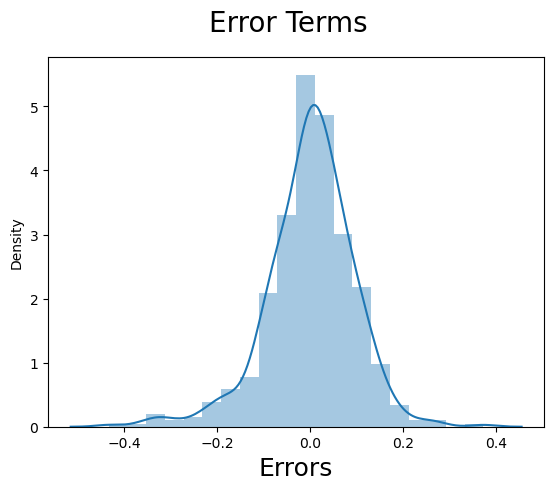

In [1388]:
fig = plt.figure()
sns.distplot((y_train_sk - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

__We can see from the histogram above that the error terms for our model is normally distributed.__

## Predictions based on Model

### Scaling test data set

In [1392]:
num_vars = bike_test_sk.columns

bike_test_sk[num_vars] = scaler.transform(bike_test_sk[num_vars])
bike_test_sk.head()

,clear,cloudy,light rain or snow,spring,summer,winter,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
184,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.545455,1.0,0.166667,0.0,0.831783,0.769660,0.657364,0.084219,0.692706
535,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.454545,0.0,0.500000,1.0,0.901354,0.842587,0.610133,0.153728,0.712034
299,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.818182,0.0,0.666667,1.0,0.511964,0.496145,0.837699,0.334206,0.303382
221,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.636364,0.0,0.500000,1.0,0.881625,0.795343,0.437098,0.339570,0.547400
152,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.454545,0.0,0.666667,1.0,0.817246,0.741471,0.314298,0.537414,0.569029


### Dividing into X_test_sk and y_test_sk

In [1394]:
y_test_sk = bike_test_sk.pop('cnt')
X_test_sk = bike_test_sk

In [1395]:
# Now let's use our model to make predictions.

# Creating X_pred dataframe by dropping variables from X_test_sk
X_pred = X_test_sk[X_train_new.columns]

X_pred = sm.add_constant(X_pred)

y_pred = lm_1.predict(X_pred)

### Model Evaluation

In [1397]:
from sklearn.metrics import r2_score
r2_score(y_test_sk, y_pred)

0.8014591758694876

Text(0, 0.5, 'y_pred')

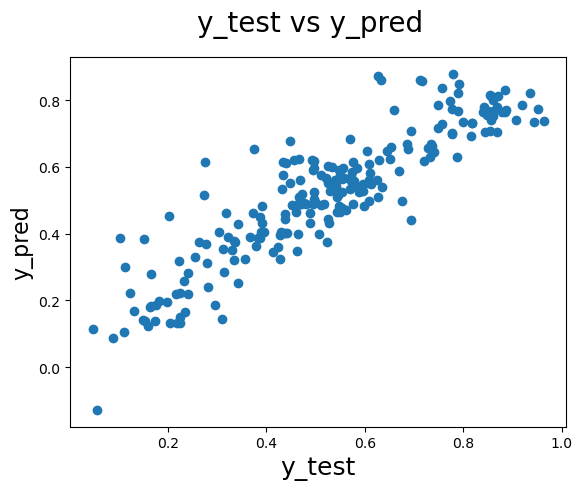

In [1398]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_sk,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

## Conclusion

The r2_score of this model is 0.80 which is quite good. 
Also from the scatter plot between the actual test data and the predicted data shows a linear relationship.
Hence we can say this model is a good fit and explains the data.
The variables that have a linear relationship with the target variable are -
- temp (positive correlation)
- windspeed (negative correlation)
- clear (positive correlation)
- yr (positive correlation)
- spring (negative correlation)
- winter (postive correlation)
- light rain or snow (negative correlation)
- holiday (negative correlation)

__Overall conclusion is as follows__ -
- When temperature increases count of rentals increases
- When the weather is clear and windspeed is low count of rentals increases
- Count of rentals go down in light rain/snow and on holidays
- Count of rentals has increased over the years

In [1401]:
import pkg_resources

packages = ['numpy', 'pandas', 'matplotlib', 'seaborn', 'statsmodels', 'scikit-learn']
for package in packages:
    print(f'{package}: {pkg_resources.get_distribution(package).version}')


numpy: 1.26.4
pandas: 2.1.4
matplotlib: 3.8.0
seaborn: 0.13.2
statsmodels: 0.14.0
scikit-learn: 1.2.2
